In [1]:
# Data analysis imports
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing

# Hyperopt imports
from hyperopt import hp, fmin, tpe, hp, STATUS_OK, Trials

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
sns.set(font_scale=2)

In [9]:
MAX_EVALS = 10000 # With this value, it will take ~20 minutes to run the hyperopt optimization code

# Load and preprocess data

In [3]:
boston = load_boston()
data = boston.data
target = boston.target

In [4]:
# scaling
data = preprocessing.scale(data)
target = preprocessing.scale(target)

In [5]:
# shuffle
np.random.seed(0)
idx = range(data.shape[0])
np.random.shuffle(idx)
data = data[idx,:]
target = target[idx]

# Hyperopt search

In [6]:
model = Lasso()

In [10]:
def score(params):
    cv = GridSearchCV(model,
                      {'alpha': [params['alpha']]},
                      cv=5)
    cv.fit(data, target)
    # hyperopt needs an error, not a score
    score = - cv.best_score_
    return {'loss': score, 'status': STATUS_OK}

In [11]:
def optimize(trials, max_evals=MAX_EVALS):
    # assume you don't know you should use a log scale
    space = {'alpha': hp.uniform('alpha', 0., 10.)}
    best = fmin(score, space, 
                algo=tpe.suggest, 
                trials=trials, 
                max_evals=max_evals)
    return best

In [14]:
trials = Trials()
best = optimize(trials)

In [15]:
def kdeplot(number_evals, ax):
    label = 'Suggested alphas density after {} evaluations'.format(str(int(number_evals)))
    return sns.kdeplot(np.array(alphas[:int(number_evals)]), label=label, ax=ax)

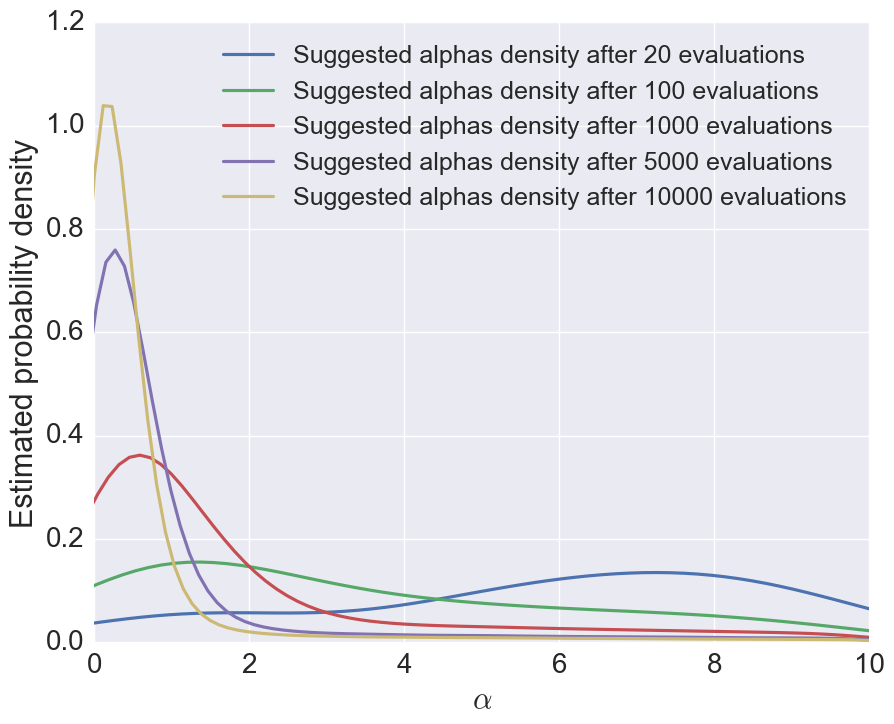

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
alphas = [trial['misc']['vals']['alpha'][0] for trial in trials.trials]
number_evals_list = np.array([0.002, 0.01, 0.1, 0.5, 1]) * MAX_EVALS


with sns.plotting_context('talk'):
    [kdeplot(number_evals, ax) for  number_evals in number_evals_list]
    ax.set_xlim(0,10)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('Estimated probability density')
    ax.legend(fontsize=18)